## Task 1 Regression on Ames Housing Dataset 

https://amueller.github.io/COMS4995-s19/homeworks/homework2-spring-2019.pdf

Data in http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls

Description in http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [4]:
# Got the list from the data description
continuous_features = [
    'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
    'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
    'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
    '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val'
]

/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


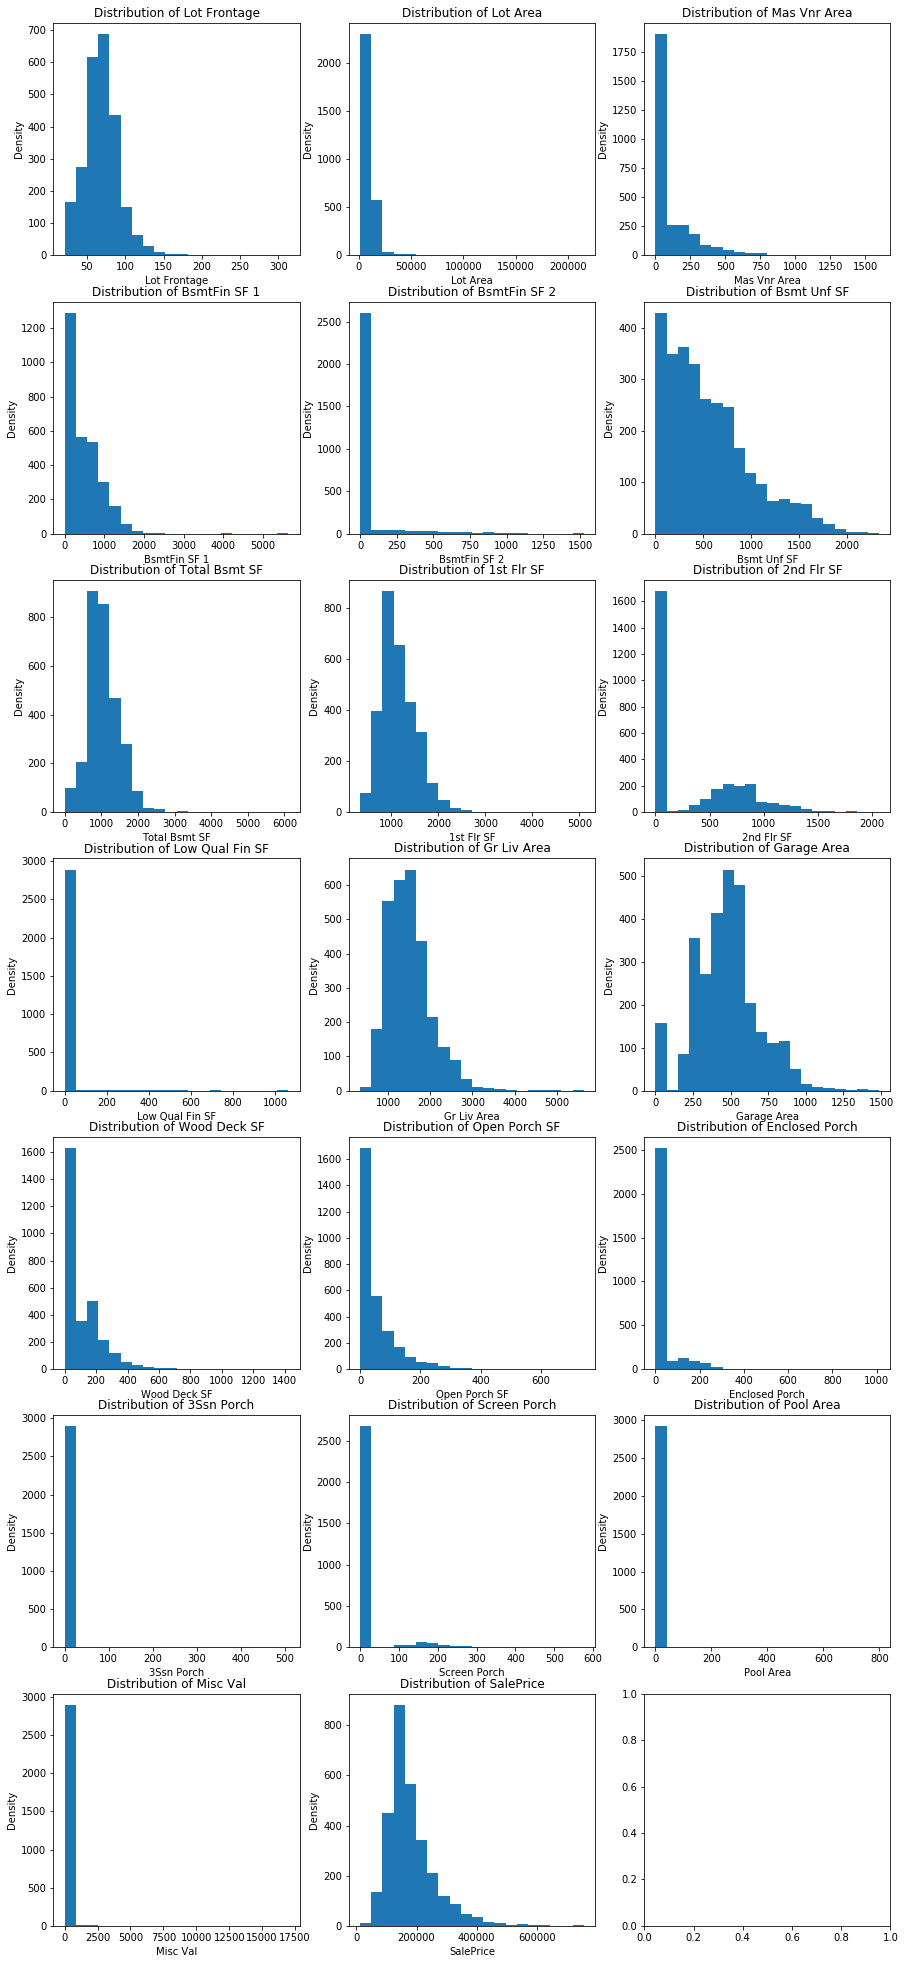

In [5]:
# Task 1.1
(fig, axes) = plt.subplots(7, 3, figsize=(15, 7 * 5))

for (column, ax) in zip(continuous_features + ['SalePrice'], axes.ravel()):
    ax.hist(df[column], bins=20)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {column}')

In [6]:
# nor so many values for "Pool Area"
print(df['Pool Area'].value_counts())

# nor so many values for "3Ssn Porch"
print(df['3Ssn Porch'].value_counts())

0      2917
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: Pool Area, dtype: int64
0      2893
153       3
168       3
144       2
180       2
216       2
219       1
176       1
86        1
96        1
120       1
130       1
140       1
255       1
150       1
162       1
245       1
174       1
225       1
23        1
182       1
196       1
323       1
224       1
238       1
290       1
304       1
320       1
360       1
508       1
407       1
Name: 3Ssn Porch, dtype: int64


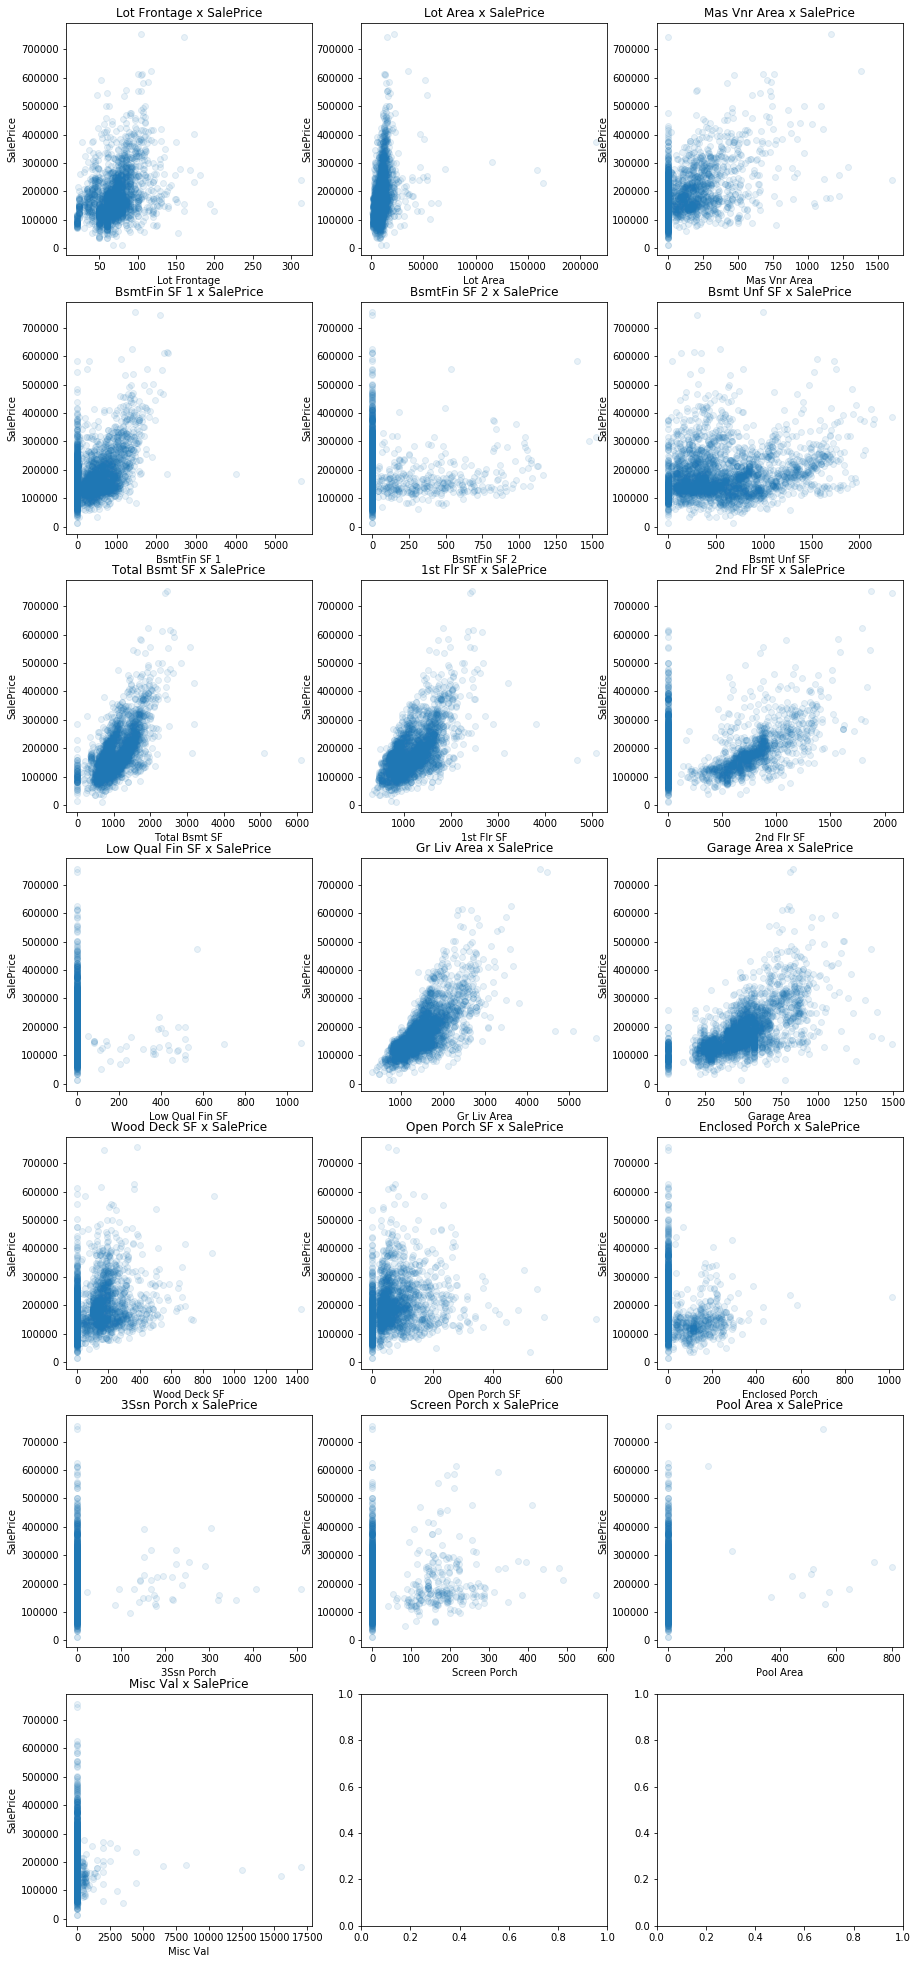

In [7]:
# Task 1.2
(fig, axes) = plt.subplots(7, 3, figsize=(15, 7 * 5))

for (column, ax) in zip(continuous_features, axes.ravel()):
    ax.scatter(df[column], df.SalePrice, alpha=0.1)
    ax.set_xlabel(column)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'{column} x SalePrice')

In [8]:
categorical_features = [
    'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
    'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
    'House Style', 'Overall Qual', 'Overall Cond','Year Built', 'Year Remod/Add', 'Roof Style',
    'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
    'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath',
    'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
    'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
    'Garage Cars', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
    'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition'
]

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [10]:
is_categorical = df.dtypes == object

transformer = make_column_transformer(
    (SimpleImputer(strategy='constant', fill_value='Unknown'), is_categorical),
    (SimpleImputer(strategy='median'), ~is_categorical),
)

transformer.fit(df)
X = transformer.transform(df)
columns = np.concatenate([df.columns[is_categorical], df.columns[~is_categorical]])
df_imputed = pd.DataFrame(X, columns=columns)

In [11]:
# Task 1.3
from sklearn.model_selection import train_test_split
(train, test) = train_test_split(df_imputed, random_state=42)

In [12]:
scores = []
for c in categorical_features:
    print(f'Fitting CV Linear Model for {c}')
    temp_df = train[[c]]
    
    transformer = make_column_transformer(
        (OneHotEncoder(categories='auto'), [c])
    )
    transformer.fit(temp_df)
    
    X = transformer.transform(temp_df)
    y = train['SalePrice']
    score = cross_val_score(LinearRegression(), X, y, cv=10, scoring='r2')
    scores.append((c, score.mean()))

Fitting CV Linear Model for MS SubClass
Fitting CV Linear Model for MS Zoning
Fitting CV Linear Model for Street
Fitting CV Linear Model for Alley
Fitting CV Linear Model for Lot Shape
Fitting CV Linear Model for Land Contour
Fitting CV Linear Model for Utilities
Fitting CV Linear Model for Lot Config
Fitting CV Linear Model for Land Slope
Fitting CV Linear Model for Neighborhood
Fitting CV Linear Model for Condition 1
Fitting CV Linear Model for Condition 2
Fitting CV Linear Model for Bldg Type
Fitting CV Linear Model for House Style
Fitting CV Linear Model for Overall Qual
Fitting CV Linear Model for Overall Cond
Fitting CV Linear Model for Year Built
Fitting CV Linear Model for Year Remod/Add
Fitting CV Linear Model for Roof Style
Fitting CV Linear Model for Roof Matl
Fitting CV Linear Model for Exterior 1st
Fitting CV Linear Model for Exterior 2nd
Fitting CV Linear Model for Mas Vnr Type
Fitting CV Linear Model for Exter Qual
Fitting CV Linear Model for Exter Cond
Fitting CV Linear

In [13]:
for (column, score) in sorted(scores, key=lambda x: x[1], reverse=True):
    print(column.ljust(10), '=', round(score, 3))

Overall Qual = 0.685
Neighborhood = 0.549
Garage Cars = 0.489
Bsmt Qual  = 0.487
Exter Qual = 0.481
Kitchen Qual = 0.459
Year Built = 0.367
Garage Yr Blt = 0.331
Full Bath  = 0.304
Fireplace Qu = 0.3
Garage Finish = 0.284
Year Remod/Add = 0.274
Foundation = 0.265
MS SubClass = 0.237
TotRms AbvGrd = 0.235
Garage Type = 0.235
Fireplaces = 0.23
BsmtFin Type 1 = 0.224
Heating QC = 0.203
Mas Vnr Type = 0.167
Bsmt Exposure = 0.166
Exterior 1st = 0.146
Exterior 2nd = 0.14
Overall Cond = 0.125
Sale Condition = 0.121
Sale Type  = 0.119
MS Zoning  = 0.115
Lot Shape  = 0.09
Half Bath  = 0.087
Garage Qual = 0.081
Bsmt Full Bath = 0.079
Garage Cond = 0.079
Paved Drive = 0.077
Central Air = 0.071
House Style = 0.065
Electrical = 0.057
Roof Style = 0.053
Bsmt Cond  = 0.043
Land Contour = 0.038
Condition 1 = 0.036
Bedroom AbvGr = 0.034
Fence      = 0.033
Bldg Type  = 0.029
BsmtFin Type 2 = 0.026
Exter Cond = 0.02
Alley      = 0.019
Lot Config = 0.016
Roof Matl  = 0.015
Condition 2 = 0.012
Kitchen AbvG

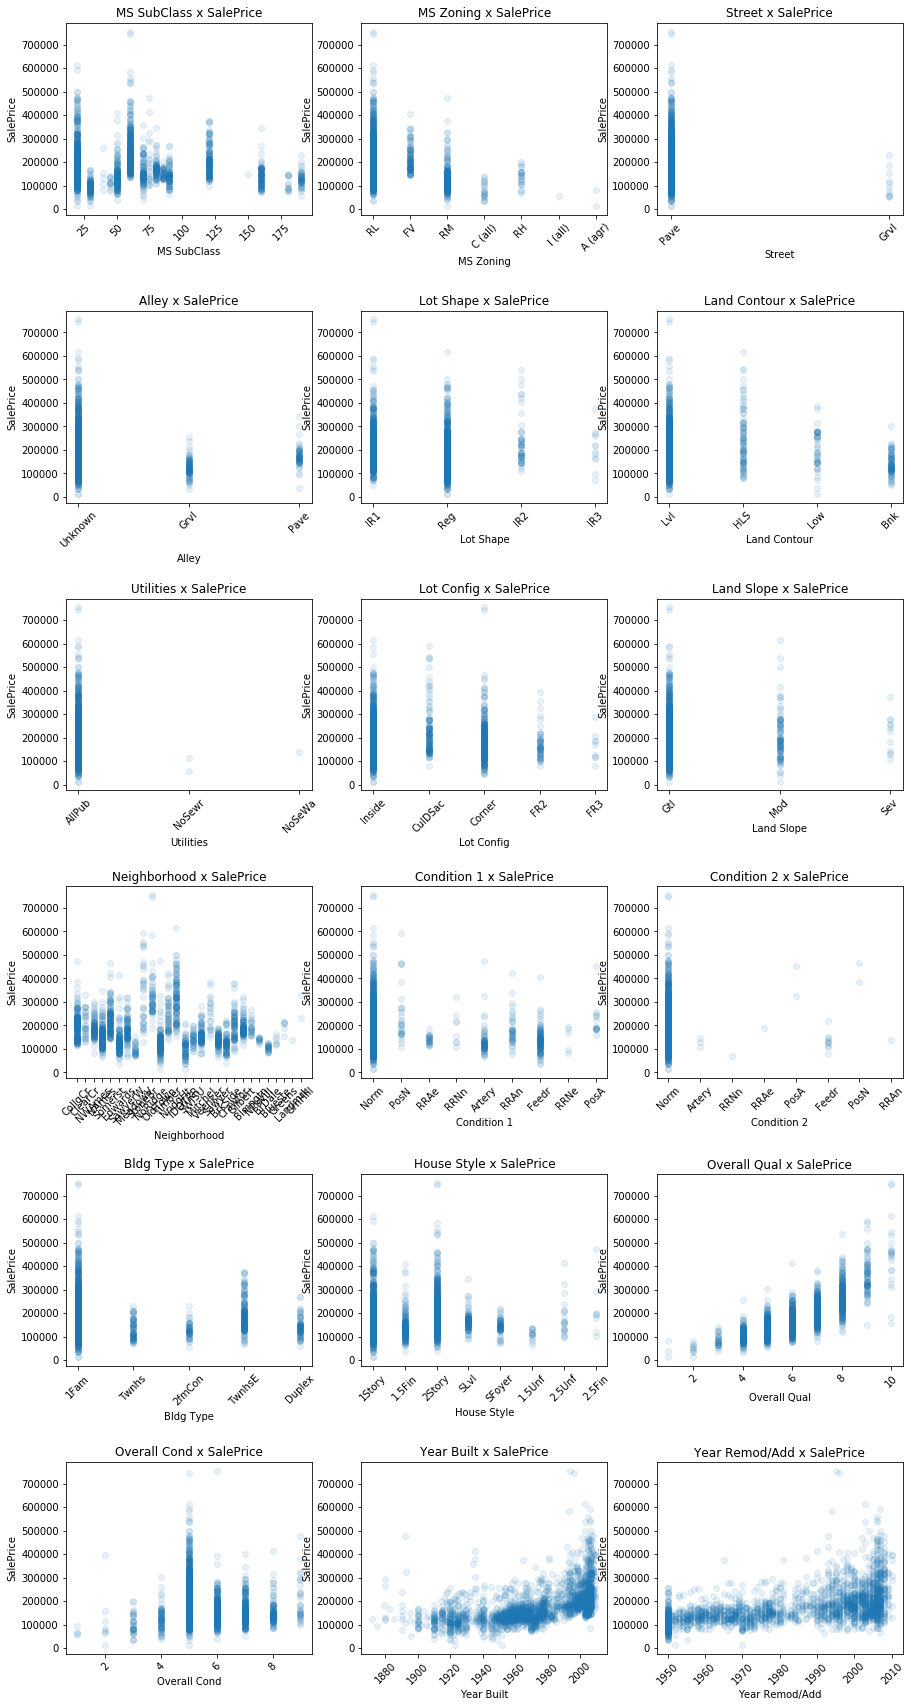

In [14]:
(fig, axes) = plt.subplots(6, 3, figsize=(15, 6 * 5))
plt.subplots_adjust(hspace=0.5)

columns = [c for (c, _) in scores]
columns = columns[:18] # take only the first 18 columns

for (column, ax) in zip(columns, axes.ravel()):
    ax.scatter(train[column], train.SalePrice, alpha=0.1)
    ax.set_xlabel(column)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'{column} x SalePrice')

In [15]:
from sklearn.linear_model import Ridge, ElasticNet, Lasso

In [16]:
# no scaling
transformer = make_column_transformer(
    (StandardScaler(with_mean=False, with_std=False), continuous_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features)
)

for cls in [LinearRegression, Ridge, ElasticNet, Lasso]:
    pipeline = make_pipeline(transformer, cls())
    scores = cross_val_score(pipeline, train, train['SalePrice'], cv=10, scoring='r2')
    print(f'{cls} = {round(np.mean(scores), 3)}')

<class 'sklearn.linear_model.base.LinearRegression'> = 0.822
<class 'sklearn.linear_model.ridge.Ridge'> = 0.241


/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1281971920721.2996, tolerance: 1217623879.0289795
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1065181321788.0985, tolerance: 1178073781.272341
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1288243586571.3882, tolerance: 1211472955.275354
  max_iter, tol, rng, ran

<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> = 0.798


/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 258756446846.62756, tolerance: 1217623879.0289795
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256880783611.9852, tolerance: 1178073781.272341
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260559536147.2583, tolerance: 1211472955.275354
  max_iter, tol, rng, rando

<class 'sklearn.linear_model.coordinate_descent.Lasso'> = 0.831


/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261240349863.5309, tolerance: 1217875944.5050874
  max_iter, tol, rng, random, positive)


In [17]:
# scaling
transformer = make_column_transformer(
    (StandardScaler(with_mean=True, with_std=True), continuous_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
)

for cls in [LinearRegression, Ridge, ElasticNet, Lasso]:
    pipeline = make_pipeline(transformer, cls())
    scores = cross_val_score(pipeline, train, train['SalePrice'], cv=10, scoring='r2')
    print(f'{cls} = {round(np.mean(scores), 3)}')

<class 'sklearn.linear_model.base.LinearRegression'> = 0.818
<class 'sklearn.linear_model.ridge.Ridge'> = 0.857
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'> = 0.811


/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65163423469.461, tolerance: 1217623879.0289795
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35821241640.548096, tolerance: 1178073781.272341
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26120696278.643066, tolerance: 1211472955.275354
  max_iter, tol, rng, random

<class 'sklearn.linear_model.coordinate_descent.Lasso'> = 0.831


/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22394860503.688965, tolerance: 1217875944.5050874
  max_iter, tol, rng, random, positive)


In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
def plot_score_and_std(ax, mean_score, std_score, color):
    ax.plot(mean_score, color=color)
    neg_std = [m - s for (m, s) in zip(mean_score, std_score)]
    pos_std = [m + s for (m, s) in zip(mean_score, std_score)]
    ax.fill_between(
        range(len(mean_score)),
        neg_std,
        pos_std,
        color=color,
        alpha=0.3
   )

In [20]:
transformer = make_column_transformer(
    (StandardScaler(with_mean=True, with_std=True), continuous_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
)

pipeline = make_pipeline(transformer, Ridge())
param_grid = {'ridge__alpha': np.logspace(-3, 0.1, 6)}
cv = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', return_train_score=True)
cv.fit(train, train['SalePrice'])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['Lot '
                                                    

{'ridge__alpha': 1.2589254117941673}
0.8565056264906267


Text(0.5, 0, 'alpha')

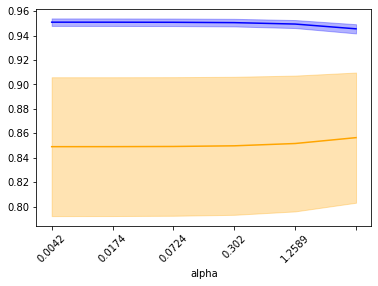

In [21]:
print(cv.best_params_)
print(cv.best_score_)
(fig, ax) = plt.subplots(1, 1)
plot_score_and_std(
    ax,
    cv.cv_results_['mean_test_score'],
    cv.cv_results_['std_test_score'],
    color='orange'
)

plot_score_and_std(
    ax,
    cv.cv_results_['mean_train_score'],
    cv.cv_results_['std_train_score'],
    color='blue'
)
labels = [round(v, 4) for v in cv.cv_results_['param_ridge__alpha']]
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('alpha')

In [22]:
transformer = make_column_transformer(
    (StandardScaler(with_mean=True, with_std=True), continuous_features),
    (OneHotEncoder(handle_unknown='ignore'), categorical_features),
)

pipeline = make_pipeline(transformer, Lasso())
param_grid = {'lasso__alpha': np.logspace(-3, 0, 6)}
cv = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', return_train_score=True)
cv.fit(train, train['SalePrice'])

/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135703831794.30144, tolerance: 1063434464.7537168
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208179386085.57123, tolerance: 1046975015.8093845
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191286205387.79324, tolerance: 1071543798.520718
  max_iter, tol, rng, ra

/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30461671946.443176, tolerance: 1063434464.7537168
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34060143256.193634, tolerance: 1046975015.8093845
  max_iter, tol, rng, random, positive)
/home/julio/Projects/coding/applied-machine-learning/.venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:459: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16426874735.34961, tolerance: 1071543798.520718
  max_iter, tol, rng, ran

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['Lot '
                                                    

{'lasso__alpha': 1.0}
0.8197162083647584


Text(0.5, 0, 'alpha')

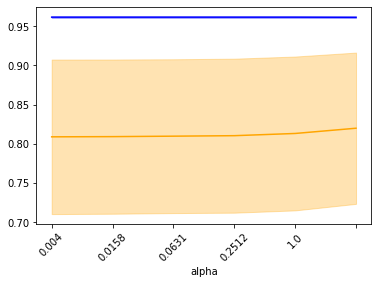

In [23]:
print(cv.best_params_)
print(cv.best_score_)
(fig, ax) = plt.subplots(1, 1)
plot_score_and_std(
    ax,
    cv.cv_results_['mean_test_score'],
    cv.cv_results_['std_test_score'],
    color='orange'
)

plot_score_and_std(
    ax,
    cv.cv_results_['mean_train_score'],
    cv.cv_results_['std_train_score'],
    color='blue'
)
labels = [round(v, 4) for v in cv.cv_results_['param_lasso__alpha']]
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('alpha')

In [24]:
cv.cv_results_

{'mean_fit_time': array([2.75671406, 2.83461003, 2.80801311, 2.84693809, 2.78822989,
        2.72790632]),
 'std_fit_time': array([0.25701183, 0.20726009, 0.22011821, 0.15610712, 0.14040025,
        0.1323582 ]),
 'mean_score_time': array([0.01712551, 0.01752725, 0.01749501, 0.01830831, 0.01859775,
        0.0183197 ]),
 'std_score_time': array([0.00039566, 0.00101355, 0.00093315, 0.00022221, 0.00053629,
        0.00020406]),
 'param_lasso__alpha': masked_array(data=[0.001, 0.003981071705534973, 0.015848931924611134,
                    0.0630957344480193, 0.25118864315095796, 1.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'lasso__alpha': 0.001},
  {'lasso__alpha': 0.003981071705534973},
  {'lasso__alpha': 0.015848931924611134},
  {'lasso__alpha': 0.0630957344480193},
  {'lasso__alpha': 0.25118864315095796},
  {'lasso__alpha': 1.0}],
 'split0_test_score': array([0.62782135, 0.62849746, 0.62966339, 0.

Text(0.5, 0, 'Feature')

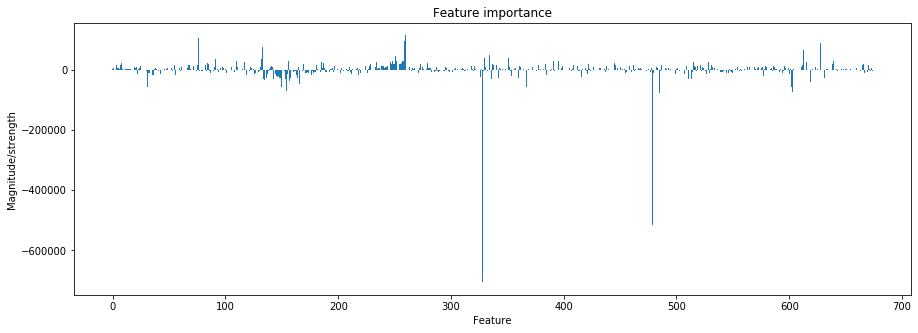

In [36]:
(fig, ax) = plt.subplots(1, 1, figsize=(15, 5))
model = cv.best_estimator_.named_steps['lasso']
features = list(range(len(model.coef_)))
ax.bar(features, model.coef_)
ax.set_title('Feature importance')
ax.set_ylabel('Magnitude/strength')
ax.set_xlabel('Feature')

In [68]:
sorted(zip(model.coef_, range(len(model.coef_))), key=lambda x: x[0])

[(-706130.2439651613, 328),
 (-517070.9167319781, 479),
 (-76675.63320075689, 485),
 (-75518.27299195676, 603),
 (-71739.06077809651, 154),
 (-59159.72702670806, 367),
 (-57458.79691909928, 602),
 (-57344.202750028984, 31),
 (-57041.40788407514, 150),
 (-51755.57020188218, 512),
 (-48188.28922543122, 166),
 (-41950.087010613635, 619),
 (-37742.41032372753, 157),
 (-34667.381705925014, 151),
 (-33784.24766903658, 135),
 (-32677.744292561016, 153),
 (-32646.448479996106, 143),
 (-32414.05154409722, 511),
 (-30499.151919507465, 336),
 (-30299.917954375836, 134),
 (-29866.79335292658, 513),
 (-29357.71202993037, 631),
 (-29335.760802370864, 148),
 (-29250.090398214274, 158),
 (-28694.950634340243, 136),
 (-28672.858048850867, 164),
 (-28264.64718166698, 65),
 (-27643.854659169683, 159),
 (-27414.521294284023, 342),
 (-27288.244504975944, 360),
 (-26654.395944807435, 149),
 (-26352.949048293547, 416),
 (-25515.17023895685, 146),
 (-25387.3948068837, 326),
 (-24006.964082672046, 637),
 (-218

In [71]:
ohe = cv.best_estimator_.named_steps['columntransformer'].transformers_[1][1]
feature_names = ohe.get_feature_names()
feature_index = 76 - len(continuous_features)
feature_names[feature_index]

'x9_GrnHill'

In [72]:
categorical_features[9]

'Neighborhood'

In [77]:
continuous_features[3]

'BsmtFin SF 1'